这份数据是我用爬虫软件从拉钩网上爬取的，是一份关于全国所有数据分析岗位的数据，而我的目的有以下几点：
#找出数据分析岗位在不同地区的分布情况
#不同地区的数据分析岗位的薪资分布情况
#招收数据分析工程师都有哪些类型的公司
#数据分析岗位对于学历的要求
#总结数据分析岗位的硬性要求有哪些

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
jobs_data = pd.read_excel("D:/jobs.xls")

In [25]:
len(jobs_data)

450

一共有450条数据

In [27]:
jobs_data

,标题,标题链接,li_b_l,money,li_b_l1,add,format-time,company_name,industry,li_b_r,缩略图,li_b_l2,li_b_l3,li_b_l4,职位描述
0,数据分析师,https://www.lagou.com/jobs/5992022.html?show=a...,15k-25k\n 经验3-5年 / 本科,15k-25k,数据分析,[北京·东城区],14:32发布,玩吧,社交 / B轮 / 150-500人,"“七险一金,免费午餐,弹性不打卡,季度旅游”",https://www.lgstatic.com/thumbnail_120x120/i/i...,SPSS,SQL,NaN,"岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,..."
1,数据分析师,https://www.lagou.com/jobs/6112372.html?show=a...,15k-30k\n 经验1-3年 / 不限,15k-30k,数据分析,[北京·小关],11:34发布,快看漫画,文娱丨内容 / D轮及以上 / 150-500人,“零食水果 免费晚餐 发展空间大”,https://www.lgstatic.com/thumbnail_120x120/ima...,NaN,NaN,NaN,"岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指..."
2,数据分析师,https://www.lagou.com/jobs/6372834.html?show=a...,20k-40k\n 经验不限 / 本科,20k-40k,数据分析,[北京·西二旗],1天前发布,快手,文娱丨内容 / D轮及以上 / 2000人以上,“高薪福利；行业独角兽；”,https://www.lgstatic.com/thumbnail_120x120/i/i...,NaN,NaN,NaN,"职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性..."
3,数据分析师（业务策略）,https://www.lagou.com/jobs/6207880.html?show=a...,15k-30k\n 经验5-10年 / 本科,15k-30k,新零售,[北京·亦庄],10:03发布,达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"“五险一金,带薪年假”",https://www.lgstatic.com/thumbnail_120x120/i/i...,本地生活,市场分析,数据分析,"岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务..."
4,数据分析师（中高级）,https://www.lagou.com/jobs/3290614.html?show=a...,15k-25k\n 经验3-5年 / 本科,15k-25k,大数据,[上海·东外滩],1天前发布,达达-京东到家,消费生活 / D轮及以上 / 2000人以上,“风口发展平台，与硅谷大牛共事，极客文化”,https://www.lgstatic.com/thumbnail_120x120/i/i...,数据分析,SPSS,NaN,"工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数..."
5,数据分析（2020届）,https://www.lagou.com/jobs/6308929.html?show=a...,9k-12k\n 经验应届毕业生 / 本科,9k-12k,物流,[珠海·香洲区],09:37发布,东方海外信息技术开发中心,"移动互联网,企业服务 / 不需要融资 / 500-2000人",“全薪培训 五险一金 工作餐 12天年假”,https://www.lgstatic.com/thumbnail_120x120/ima...,企业服务,NaN,NaN,"1.具备良好的数学, 统计学基础，对数据敏感，逻辑性强，参与海运和物流相关系统，航运电商平台..."
6,数据分析,https://www.lagou.com/jobs/6372725.html?show=a...,20k-40k\n 经验5-10年 / 本科,20k-40k,交通补助,[北京·昌平区],1天前发布,泰康保险集团,金融 / 不需要融资 / 2000人以上,“世界五百强，七险二金，7.5H弹性工作”,https://www.lgstatic.com/thumbnail_120x120/i/i...,午餐补助,带薪年假,定期体检,2、APP数据运营平台研发；
7,数据分析师,https://www.lagou.com/jobs/6201593.html?show=a...,10k-18k\n 经验1-3年 / 本科,10k-18k,SQL,[北京·苏州街],1天前发布,拉勾网,企业服务 / D轮及以上 / 500-2000人,“业务数据；可视化；分析”,https://www.lgstatic.com/thumbnail_120x120/i/i...,数据分析,BI,SPSS,"岗位职责：,1、目标监测：测算业务目标，跟进业务目标达成情况，提出运营优化建议；2、商业分析..."
8,数据分析师,https://www.lagou.com/jobs/5120398.html?show=a...,13k-25k\n 经验3-5年 / 本科,13k-25k,数据分析,[北京·海淀区],1天前发布,字节跳动,文娱丨内容 / C轮 / 2000人以上,“六险一金，弹性工作，免费三餐，租房补贴”,https://www.lgstatic.com/thumbnail_120x120/i/i...,NaN,NaN,NaN,NaN
9,数据分析师,https://www.lagou.com/jobs/6369543.html?show=a...,10k-15k\n 经验3-5年 / 本科,10k-15k,数据分析,[杭州·余杭区],13:40发布,如程,移动互联网 / 未融资 / 50-150人,“行业前景好，晋升路径清晰，周末双休”,https://www.lgstatic.com/thumbnail_120x120/i/i...,数据运营,SQL,NaN,"职位描述：,1.通过对业务的深入了解，执行相关的业务检测体系，能够有效披露业务进展和风险,2..."


数据中有些属性不够规范，也有些是用不到的，下面先做一下处理

In [3]:
jobs_data.columns

Index(['标题', '标题链接', 'li_b_l', 'money', 'li_b_l1', 'add', 'format-time',
       'company_name', 'industry', 'li_b_r', '缩略图', 'li_b_l2', 'li_b_l3',
       'li_b_l4', '职位描述'],
      dtype='object')

In [4]:
jobs_data = jobs_data.drop(['标题链接','li_b_l1','format-time','li_b_r','缩略图','li_b_l2','li_b_l3','li_b_l4'],axis=1)

In [30]:
jobs_data

,标题,li_b_l,money,add,company_name,industry,职位描述
0,数据分析师,15k-25k\n 经验3-5年 / 本科,15k-25k,[北京·东城区],玩吧,社交 / B轮 / 150-500人,"岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,..."
1,数据分析师,15k-30k\n 经验1-3年 / 不限,15k-30k,[北京·小关],快看漫画,文娱丨内容 / D轮及以上 / 150-500人,"岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指..."
2,数据分析师,20k-40k\n 经验不限 / 本科,20k-40k,[北京·西二旗],快手,文娱丨内容 / D轮及以上 / 2000人以上,"职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性..."
3,数据分析师（业务策略）,15k-30k\n 经验5-10年 / 本科,15k-30k,[北京·亦庄],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务..."
4,数据分析师（中高级）,15k-25k\n 经验3-5年 / 本科,15k-25k,[上海·东外滩],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数..."
5,数据分析（2020届）,9k-12k\n 经验应届毕业生 / 本科,9k-12k,[珠海·香洲区],东方海外信息技术开发中心,"移动互联网,企业服务 / 不需要融资 / 500-2000人","1.具备良好的数学, 统计学基础，对数据敏感，逻辑性强，参与海运和物流相关系统，航运电商平台..."
6,数据分析,20k-40k\n 经验5-10年 / 本科,20k-40k,[北京·昌平区],泰康保险集团,金融 / 不需要融资 / 2000人以上,2、APP数据运营平台研发；
7,数据分析师,10k-18k\n 经验1-3年 / 本科,10k-18k,[北京·苏州街],拉勾网,企业服务 / D轮及以上 / 500-2000人,"岗位职责：,1、目标监测：测算业务目标，跟进业务目标达成情况，提出运营优化建议；2、商业分析..."
8,数据分析师,13k-25k\n 经验3-5年 / 本科,13k-25k,[北京·海淀区],字节跳动,文娱丨内容 / C轮 / 2000人以上,NaN
9,数据分析师,10k-15k\n 经验3-5年 / 本科,10k-15k,[杭州·余杭区],如程,移动互联网 / 未融资 / 50-150人,"职位描述：,1.通过对业务的深入了解，执行相关的业务检测体系，能够有效披露业务进展和风险,2..."


In [5]:
jobs_data.columns = ['title','infomation','salary','address','company_name','industry','description']

In [32]:
jobs_data

,title,infomation,salary,address,company_name,industry,description
0,数据分析师,15k-25k\n 经验3-5年 / 本科,15k-25k,[北京·东城区],玩吧,社交 / B轮 / 150-500人,"岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,..."
1,数据分析师,15k-30k\n 经验1-3年 / 不限,15k-30k,[北京·小关],快看漫画,文娱丨内容 / D轮及以上 / 150-500人,"岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指..."
2,数据分析师,20k-40k\n 经验不限 / 本科,20k-40k,[北京·西二旗],快手,文娱丨内容 / D轮及以上 / 2000人以上,"职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性..."
3,数据分析师（业务策略）,15k-30k\n 经验5-10年 / 本科,15k-30k,[北京·亦庄],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务..."
4,数据分析师（中高级）,15k-25k\n 经验3-5年 / 本科,15k-25k,[上海·东外滩],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数..."
5,数据分析（2020届）,9k-12k\n 经验应届毕业生 / 本科,9k-12k,[珠海·香洲区],东方海外信息技术开发中心,"移动互联网,企业服务 / 不需要融资 / 500-2000人","1.具备良好的数学, 统计学基础，对数据敏感，逻辑性强，参与海运和物流相关系统，航运电商平台..."
6,数据分析,20k-40k\n 经验5-10年 / 本科,20k-40k,[北京·昌平区],泰康保险集团,金融 / 不需要融资 / 2000人以上,2、APP数据运营平台研发；
7,数据分析师,10k-18k\n 经验1-3年 / 本科,10k-18k,[北京·苏州街],拉勾网,企业服务 / D轮及以上 / 500-2000人,"岗位职责：,1、目标监测：测算业务目标，跟进业务目标达成情况，提出运营优化建议；2、商业分析..."
8,数据分析师,13k-25k\n 经验3-5年 / 本科,13k-25k,[北京·海淀区],字节跳动,文娱丨内容 / C轮 / 2000人以上,NaN
9,数据分析师,10k-15k\n 经验3-5年 / 本科,10k-15k,[杭州·余杭区],如程,移动互联网 / 未融资 / 50-150人,"职位描述：,1.通过对业务的深入了解，执行相关的业务检测体系，能够有效披露业务进展和风险,2..."


下面对数据分析岗位的地区分布进行统计

In [165]:
address = {}

#统计每个地区出现的次数
for i in range(len(jobs_data)):
    addr = jobs_data['address'][i].split("·")[0][1:3]
    address[addr] = address.get(addr,0) + 1

In [166]:
#排序
address = sorted(address.items(),key=lambda address:address[1],reverse=False)

In [167]:
address_number = []
address_addr = []

for i in range(len(address)):
    address_number.append(address[i][1])
    address_addr.append(address[i][0])

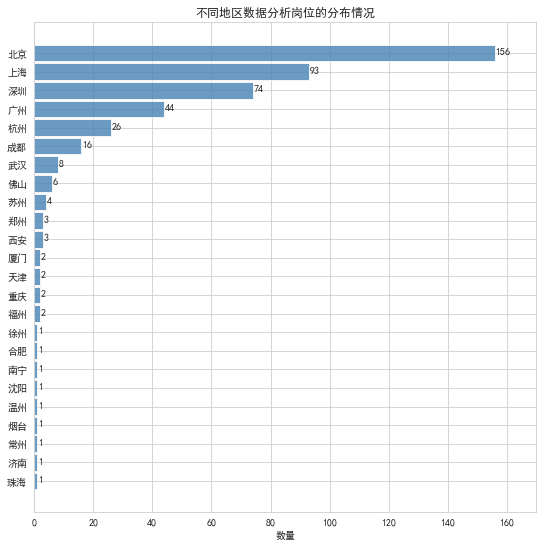

In [171]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(9,9))
plt.barh(address_addr,address_number,height=0.9,color='steelblue',alpha=0.8)
plt.yticks(range(24),address_addr)
plt.xlim(0,170)
plt.xlabel("数量")
plt.title("不同地区数据分析岗位的分布情况")
for x, y in enumerate(address_number):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

从结果可以看出，北京对于数据分析的需求是最多的，有156条，然后依次是上海、深圳、广州、杭州，所以对于数据分析岗位来说，只有一线大城市才会有需求，小城市的需求量非常少

下面对岗位的薪资分布进行统计

In [200]:
jobs_data

,title,infomation,salary,address,company_name,industry,description
0,数据分析师,15k-25k\n 经验3-5年 / 本科,15k-25k,[北京·东城区],玩吧,社交 / B轮 / 150-500人,"岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,..."
1,数据分析师,15k-30k\n 经验1-3年 / 不限,15k-30k,[北京·小关],快看漫画,文娱丨内容 / D轮及以上 / 150-500人,"岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指..."
2,数据分析师,20k-40k\n 经验不限 / 本科,20k-40k,[北京·西二旗],快手,文娱丨内容 / D轮及以上 / 2000人以上,"职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性..."
3,数据分析师（业务策略）,15k-30k\n 经验5-10年 / 本科,15k-30k,[北京·亦庄],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务..."
4,数据分析师（中高级）,15k-25k\n 经验3-5年 / 本科,15k-25k,[上海·东外滩],达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数..."
5,数据分析（2020届）,9k-12k\n 经验应届毕业生 / 本科,9k-12k,[珠海·香洲区],东方海外信息技术开发中心,"移动互联网,企业服务 / 不需要融资 / 500-2000人","1.具备良好的数学, 统计学基础，对数据敏感，逻辑性强，参与海运和物流相关系统，航运电商平台..."
6,数据分析,20k-40k\n 经验5-10年 / 本科,20k-40k,[北京·昌平区],泰康保险集团,金融 / 不需要融资 / 2000人以上,2、APP数据运营平台研发；
7,数据分析师,10k-18k\n 经验1-3年 / 本科,10k-18k,[北京·苏州街],拉勾网,企业服务 / D轮及以上 / 500-2000人,"岗位职责：,1、目标监测：测算业务目标，跟进业务目标达成情况，提出运营优化建议；2、商业分析..."
8,数据分析师,13k-25k\n 经验3-5年 / 本科,13k-25k,[北京·海淀区],字节跳动,文娱丨内容 / C轮 / 2000人以上,NaN
9,数据分析师,10k-15k\n 经验3-5年 / 本科,10k-15k,[杭州·余杭区],如程,移动互联网 / 未融资 / 50-150人,"职位描述：,1.通过对业务的深入了解，执行相关的业务检测体系，能够有效披露业务进展和风险,2..."


In [239]:
jobs_salary = {}

for i in range(len(jobs_data)):
    #最低薪资
    low_salary = int(jobs_data['salary'][i].split('-')[0][:len(jobs_data['salary'][i].split('-')[0])-1])
    #最高薪资
    high_salary = int(jobs_data['salary'][i].split('-')[1][:len(jobs_data['salary'][i].split('-')[1])-1])
    #10k以内
    if (low_salary + high_salary)//2 < 10:
        jobs_salary['10k以内'] = jobs_salary.get('10k以内',0) + 1
    #15k
    elif (low_salary + high_salary)//2 < 16:
        jobs_salary['15k左右'] = jobs_salary.get('15k左右',0) + 1
    #25k
    elif (low_salary + high_salary)//2 < 26:
        jobs_salary['25k左右'] = jobs_salary.get('25k左右',0) + 1
    #35k
    elif (low_salary + high_salary)//2 < 36:
        jobs_salary['35k左右'] = jobs_salary.get('35k左右',0) + 1
    #40以上
    else:
        jobs_salary['40k以上'] = jobs_salary.get('40k以上',0) + 1

数据中的薪资区间很混乱，很难做统一的统计，所以我是通过平均值来定义薪资范围的

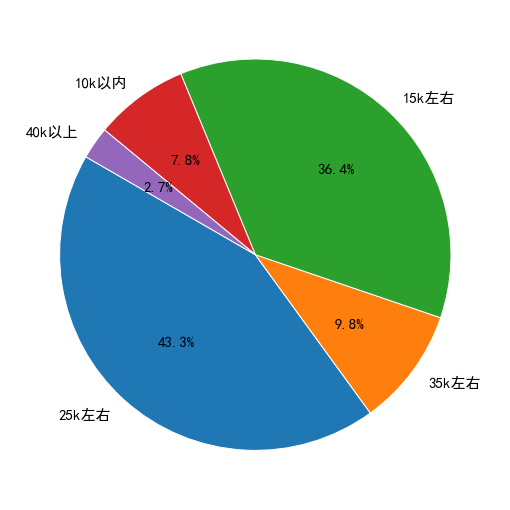

In [254]:
fig = plt.figure(figsize=(9,9))
labels = list(jobs_salary.keys())
nums = list(jobs_salary.values())
explode = (0,0,0,0,0)
plt.pie(nums,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':15,'color':'black'})
plt.show()

从上面的结果可以看出，该岗位在全国的薪资表现是比较高的，15k左右和25k左右占了很大的比重，两个极端占的比重很少，不过这样的表现也只存在于一线城市

下面分析一下北京、上海和深圳这三座城市在薪资方面的具体表现是怎样的

首先是北京

In [262]:
#将address属性做精简
for i in range(len(jobs_data)):
    jobs_data['address'][i] = jobs_data['address'][i].split('·')[0][1:3]

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [263]:
jobs_data

,title,infomation,salary,address,company_name,industry,description,15k以上
0,数据分析师,15k-25k\n 经验3-5年 / 本科,15k-25k,北京,玩吧,社交 / B轮 / 150-500人,"岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,...",1
1,数据分析师,15k-30k\n 经验1-3年 / 不限,15k-30k,北京,快看漫画,文娱丨内容 / D轮及以上 / 150-500人,"岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指...",1
2,数据分析师,20k-40k\n 经验不限 / 本科,20k-40k,北京,快手,文娱丨内容 / D轮及以上 / 2000人以上,"职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性...",1
3,数据分析师（业务策略）,15k-30k\n 经验5-10年 / 本科,15k-30k,北京,达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务...",1
4,数据分析师（中高级）,15k-25k\n 经验3-5年 / 本科,15k-25k,上海,达达-京东到家,消费生活 / D轮及以上 / 2000人以上,"工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数...",1
5,数据分析（2020届）,9k-12k\n 经验应届毕业生 / 本科,9k-12k,珠海,东方海外信息技术开发中心,"移动互联网,企业服务 / 不需要融资 / 500-2000人","1.具备良好的数学, 统计学基础，对数据敏感，逻辑性强，参与海运和物流相关系统，航运电商平台...",1
6,数据分析,20k-40k\n 经验5-10年 / 本科,20k-40k,北京,泰康保险集团,金融 / 不需要融资 / 2000人以上,2、APP数据运营平台研发；,1
7,数据分析师,10k-18k\n 经验1-3年 / 本科,10k-18k,北京,拉勾网,企业服务 / D轮及以上 / 500-2000人,"岗位职责：,1、目标监测：测算业务目标，跟进业务目标达成情况，提出运营优化建议；2、商业分析...",1
8,数据分析师,13k-25k\n 经验3-5年 / 本科,13k-25k,北京,字节跳动,文娱丨内容 / C轮 / 2000人以上,NaN,1
9,数据分析师,10k-15k\n 经验3-5年 / 本科,10k-15k,杭州,如程,移动互联网 / 未融资 / 50-150人,"职位描述：,1.通过对业务的深入了解，执行相关的业务检测体系，能够有效披露业务进展和风险,2...",1


In [264]:
jobs_beijing = jobs_data[jobs_data.address == '北京']

In [271]:
jobs_beijing.index = np.arange(len(jobs_beijing))

In [273]:
jobs_beijing_salary = {}

for i in range(len(jobs_beijing)):
    #最低薪资
    low_salary = int(jobs_beijing['salary'][i].split('-')[0][:len(jobs_beijing['salary'][i].split('-')[0])-1])
    #最高薪资
    high_salary = int(jobs_beijing['salary'][i].split('-')[1][:len(jobs_beijing['salary'][i].split('-')[1])-1])
    #10k以内
    if (low_salary + high_salary)//2 < 10:
        jobs_beijing_salary['10k以内'] = jobs_beijing_salary.get('10k以内',0) + 1
    #15k
    elif (low_salary + high_salary)//2 < 16:
        jobs_beijing_salary['15k左右'] = jobs_beijing_salary.get('15k左右',0) + 1
    #25k
    elif (low_salary + high_salary)//2 < 26:
        jobs_beijing_salary['25k左右'] = jobs_beijing_salary.get('25k左右',0) + 1
    #35k
    elif (low_salary + high_salary)//2 < 36:
        jobs_beijing_salary['35k左右'] = jobs_beijing_salary.get('35k左右',0) + 1
    #40以上
    else:
        jobs_beijing_salary['40k以上'] = jobs_beijing_salary.get('40k以上',0) + 1

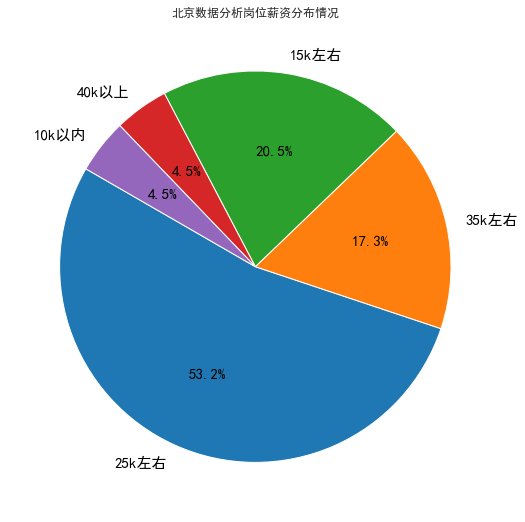

In [283]:
fig = plt.figure(figsize=(9,9))
labels = list(jobs_beijing_salary.keys())
nums = list(jobs_beijing_salary.values())
explode = (0,0,0,0,0)
plt.pie(nums,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':15,'color':'black'})
plt.title("北京数据分析岗位薪资分布情况")
plt.show()

上面是北京的情况，其中有一半的岗位薪资在25k左右，然后是15k的也比较多，所以依然是15k和25
k左右的薪资是最多的，两个极端的岗位薪资很少

然后是上海

In [275]:
jobs_shanghai = jobs_data[jobs_data.address == '上海']
jobs_shanghai.index = np.arange(len(jobs_shanghai))

In [278]:
jobs_shanghai_salary = {}

for i in range(len(jobs_shanghai)):
    #最低薪资
    low_salary = int(jobs_shanghai['salary'][i].split('-')[0][:len(jobs_shanghai['salary'][i].split('-')[0])-1])
    #最高薪资
    high_salary = int(jobs_shanghai['salary'][i].split('-')[1][:len(jobs_shanghai['salary'][i].split('-')[1])-1])
    #10k以内
    if (low_salary + high_salary)//2 < 10:
        jobs_shanghai_salary['10k以内'] = jobs_shanghai_salary.get('10k以内',0) + 1
    #15k
    elif (low_salary + high_salary)//2 < 16:
        jobs_shanghai_salary['15k左右'] = jobs_shanghai_salary.get('15k左右',0) + 1
    #25k
    elif (low_salary + high_salary)//2 < 26:
        jobs_shanghai_salary['25k左右'] = jobs_shanghai_salary.get('25k左右',0) + 1
    #35k
    elif (low_salary + high_salary)//2 < 36:
        jobs_shanghai_salary['35k左右'] = jobs_shanghai_salary.get('35k左右',0) + 1
    #40以上
    else:
        jobs_shanghai_salary['40k以上'] = jobs_shanghai_salary.get('40k以上',0) + 1

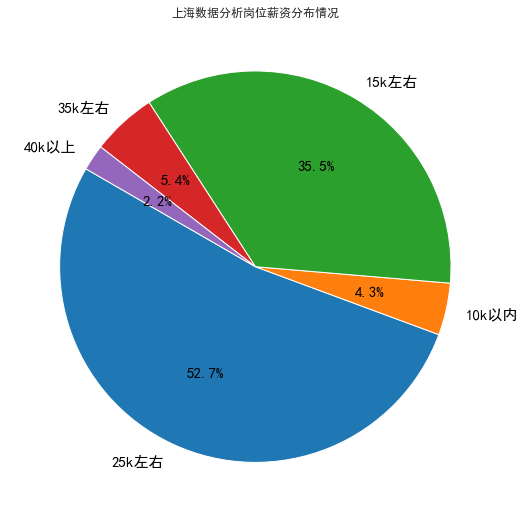

In [284]:
fig = plt.figure(figsize=(9,9))
labels = list(jobs_shanghai_salary.keys())
nums = list(jobs_shanghai_salary.values())
explode = (0,0,0,0,0)
plt.pie(nums,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':15,'color':'black'})
plt.title("上海数据分析岗位薪资分布情况")
plt.show()

上面是上海的统计结果，其中薪资在25k的占比与北京基本一样，但是15k的岗位比北京要多，35k薪资的岗位比北京少，薪资水平依然保持在15k和25k左右的水平

最后是深圳

In [280]:
jobs_shenzhen = jobs_data[jobs_data.address == '深圳']
jobs_shenzhen.index = np.arange(len(jobs_shenzhen))

In [281]:
jobs_shenzhen_salary = {}

for i in range(len(jobs_shenzhen)):
    #最低薪资
    low_salary = int(jobs_shenzhen['salary'][i].split('-')[0][:len(jobs_shenzhen['salary'][i].split('-')[0])-1])
    #最高薪资
    high_salary = int(jobs_shenzhen['salary'][i].split('-')[1][:len(jobs_shenzhen['salary'][i].split('-')[1])-1])
    #10k以内
    if (low_salary + high_salary)//2 < 10:
        jobs_shenzhen_salary['10k以内'] = jobs_shenzhen_salary.get('10k以内',0) + 1
    #15k
    elif (low_salary + high_salary)//2 < 16:
        jobs_shenzhen_salary['15k左右'] = jobs_shenzhen_salary.get('15k左右',0) + 1
    #25k
    elif (low_salary + high_salary)//2 < 26:
        jobs_shenzhen_salary['25k左右'] = jobs_shenzhen_salary.get('25k左右',0) + 1
    #35k
    elif (low_salary + high_salary)//2 < 36:
        jobs_shenzhen_salary['35k左右'] = jobs_shenzhen_salary.get('35k左右',0) + 1
    #40以上
    else:
        jobs_shenzhen_salary['40k以上'] = jobs_shenzhen_salary.get('40k以上',0) + 1

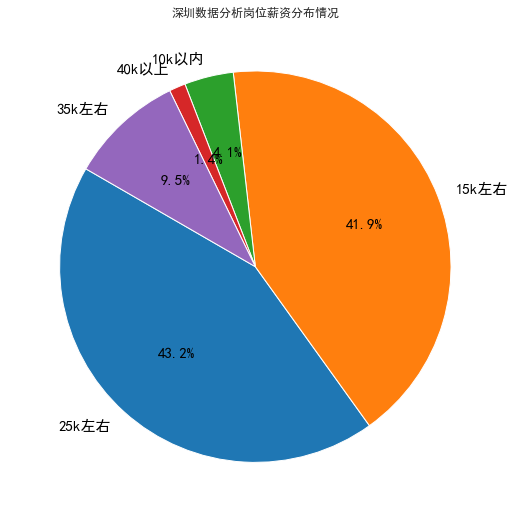

In [285]:
fig = plt.figure(figsize=(9,9))
labels = list(jobs_shenzhen_salary.keys())
nums = list(jobs_shenzhen_salary.values())
explode = (0,0,0,0,0)
plt.pie(nums,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':15,'color':'black'})
plt.title("深圳数据分析岗位薪资分布情况")
plt.show()

上面是深圳的薪资分布情况，可以看到25k这个薪资水平比北京和上海都要低一点，而15k水平的比北京、上海都要多，在40k以上的职位是非常少的

以上三座城市在数据分析岗位的薪资水平的分布是差不多的，所以一线城市基本的薪资水平都在15k和25k左右的状态

下面统计一下数据分析岗位主要分布在哪些类型的公司中

In [287]:
jobs_data['industry']

0                  社交 / B轮 / 150-500人
1            文娱丨内容 / D轮及以上 / 150-500人
2             文娱丨内容 / D轮及以上 / 2000人以上
3              消费生活 / D轮及以上 / 2000人以上
4              消费生活 / D轮及以上 / 2000人以上
5      移动互联网,企业服务 / 不需要融资 / 500-2000人
6                金融 / 不需要融资 / 2000人以上
7            企业服务 / D轮及以上 / 500-2000人
8                文娱丨内容 / C轮 / 2000人以上
9               移动互联网 / 未融资 / 50-150人
10        硬件,企业服务 / 不需要融资 / 500-2000人
11            电商,消费生活 / B轮 / 150-500人
12            文娱丨内容 / D轮及以上 / 2000人以上
13               文娱丨内容 / C轮 / 2000人以上
14               文娱丨内容 / C轮 / 2000人以上
15               文娱丨内容 / 天使轮 / 15-50人
16             消费生活 / D轮及以上 / 2000人以上
17            电商,消费生活 / B轮 / 150-500人
18               游戏,社交 / B轮 / 50-150人
19                消费生活 / C轮 / 2000人以上
20               移动互联网 / C轮 / 50-150人
21             软件开发、工具 / 天使轮 / 15-50人
22            移动互联网,金融 / A轮 / 50-150人
23            文娱丨内容 / D轮及以上 / 2000人以上
24        移动互联网,数据服务 / 上市公司 / 2000人以上
25                金融 / 上市公司 / 2000人以上
26          

In [293]:
#切分数据
for i in range(len(jobs_data)):
    jobs_data['industry'][i] = jobs_data['industry'][i].split("/")[0]

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [297]:
jobs_industry = {}

#统计不同公司类型出现的次数
for i in range(len(jobs_data)):
    industry = jobs_data['industry'][i]
    jobs_industry[industry] = jobs_industry.get(industry,0) + 1

In [298]:
jobs_industry

{'社交 ': 4,
 '文娱丨内容 ': 40,
 '消费生活 ': 31,
 '移动互联网,企业服务 ': 8,
 '金融 ': 67,
 '企业服务 ': 8,
 '移动互联网 ': 46,
 '硬件,企业服务 ': 1,
 '电商,消费生活 ': 3,
 '游戏,社交 ': 4,
 '软件开发、工具 ': 1,
 '移动互联网,金融 ': 31,
 '移动互联网,数据服务 ': 8,
 '旅游 ': 1,
 '企业服务,数据服务 ': 13,
 '移动互联网,消费生活 ': 7,
 '电商 ': 23,
 '信息安全,数据服务 ': 5,
 '移动互联网,游戏 ': 10,
 '游戏 ': 8,
 '游戏,移动互联网 ': 1,
 '金融,移动互联网 ': 3,
 '移动互联网,电商 ': 13,
 '金融,其他 ': 1,
 '移动互联网,教育 ': 14,
 '广告营销 ': 1,
 '数据服务,企业服务 ': 1,
 '消费生活,电商 ': 3,
 '硬件 ': 2,
 '企业服务,移动互联网 ': 4,
 '软件开发,其他 ': 1,
 '其他 ': 1,
 '教育 ': 7,
 '硬件,人工智能 ': 1,
 '数据服务,移动互联网 ': 5,
 '移动互联网,文娱丨内容 ': 3,
 '汽车丨出行 ': 1,
 '移动互联网,社交 ': 3,
 '数据服务 ': 13,
 '数据服务,人工智能 ': 2,
 '房产家居 ': 3,
 '电商,其他 ': 2,
 '信息安全 ': 1,
 '金融,数据服务 ': 6,
 '教育,移动互联网 ': 2,
 '社交,文娱丨内容 ': 2,
 '消费生活,移动互联网 ': 3,
 '数据服务,文娱丨内容 ': 1,
 '数据服务,信息安全 ': 1,
 '工具 ': 1,
 '电商,移动互联网 ': 2,
 '数据服务,房产家居 ': 3,
 '金融,人工智能 ': 1,
 '消费生活,文娱丨内容 ': 1,
 '金融,软件开发 ': 3,
 '数据服务,电商 ': 1,
 '社交,游戏 ': 1,
 '社交,金融 ': 1,
 '企业服务,软件开发 ': 1,
 '电子商务 ': 1,
 '游戏,文娱丨内容 ': 1,
 '企业服务,金融 ': 2,
 '移动互联网,区块链 ': 1,
 '物流丨运输 

In [300]:
#排序
jobs_industry = sorted(jobs_industry.items(),key=lambda jobs_industry:jobs_industry[1],reverse=False)

In [302]:
industry_number = []
industry_names = []

for i in range(len(jobs_industry)):
    industry_number.append(jobs_industry[i][1])
    industry_names.append(jobs_industry[i][0])

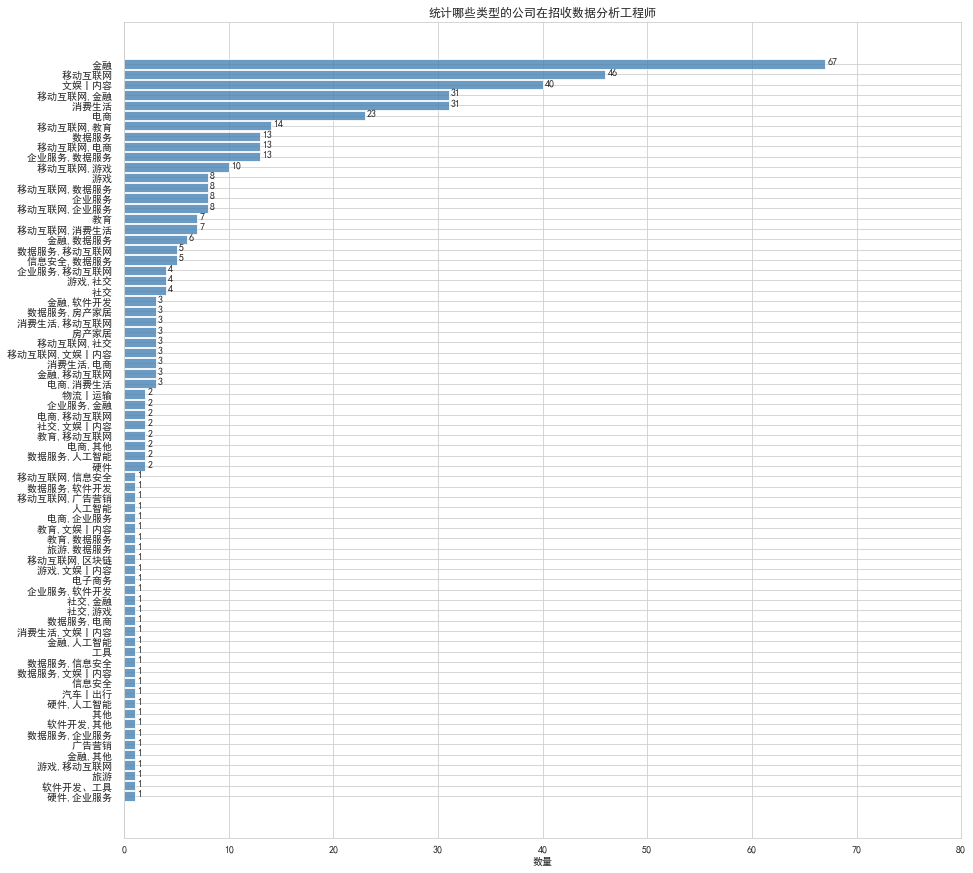

In [309]:
fig = plt.figure(figsize=(15,15))
plt.barh(industry_names,industry_number,height=0.9,color='steelblue',alpha=0.8)
plt.yticks(industry_names)
plt.xlim(0,80)
plt.xlabel("数量")
plt.title("统计哪些类型的公司在招收数据分析工程师")
for x, y in enumerate(industry_number):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

上面就是统计结果，总结一下top10的公司：
#1、金融
#2、移动互联网
#3、文娱
#4、移动互联网金融
#5、消费生活
#6、电商
#7、教育
#8、数据服务
#9、游戏
#10、企业服务

下面统计学历的分布情况

In [331]:
#分割处理
for i in range(len(jobs_data)):
    jobs_data['education'][i] = jobs_data['infomation'][i].split('/')[1]

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [333]:
educations = {}

#统计不同学历出现的次数
for i in range(len(jobs_data)):
    education = jobs_data['education'][i]
    educations[education] = educations.get(education,0) + 1

In [336]:
educations

{' 本科': 383, ' 不限': 29, ' 硕士': 20, ' 大专': 18}

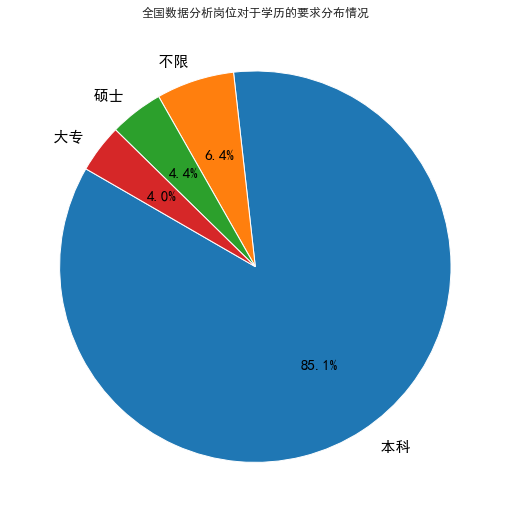

In [338]:
fig = plt.figure(figsize=(9,9))
labels = list(educations.keys())
nums = list(educations.values())
explode = (0,0,0,0)
plt.pie(nums,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':15,'color':'black'})
plt.title("全国数据分析岗位对于学历的要求分布情况")
plt.show()

本科的比重是最大的，占了85%，其他的学历都很少

而像北京这样的一线城市，肯定是符合这种分布的，因为一线城市的数据占了大部分

下面是最后一个任务，找出数据分析岗位的任职要求都有哪些硬性的要求

In [6]:
#去除description中含有缺失值的项
new_jobs_data = jobs_data[jobs_data['description'].notnull()]
new_jobs_data.index = np.arange(len(new_jobs_data))

In [9]:
new_jobs_data['description'].head()

0    岗位职责：,1.分析数据报表，监控产品运行数据,2.理解业务流程和关键点，确认重点监控指标,...
1    岗位职责：,1、负责对相关业务数据进行结构化和分析；,2、与相关部门协调，清晰定义业务数据指...
2    职位描述：,1、分析和挖掘海量数据，发现用户行为模式与规律；,2、优化用户体验，提升社区粘性...
3    岗位职责：,1. 基于业务发展和业务策略，搭建及不断优化城市/商户/门店分级，并推进其在业务...
4    工作职责：,1、负责O2O业务的数据分析工作，挖掘数据分析需求，制定并实施分析方案，并根据数...
Name: description, dtype: object

最后一个任务算是最难的，因为从上面的数据就可以看出来，数据是很混乱的，有中文、英文、数字和一些标点符号，所以必须合理的筛选才可以

还有一点，内容中有很多中文，而中文不像英文那样用空格分隔单词，中文都是连贯起来的，所以需要先对其进行分词处理，而我使用的是Pkuseg，这是北大的开源分词工具，是目前分词准确率最高的工具，分词结束后才可以进行后续的处理

In [550]:
#导入分词工具和正则化工具
import pkuseg
import re

In [567]:
texts = []

#筛选出所有符合要求的字段
for i in range(len(new_jobs_data)):
    if '岗位要求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split('岗位要求')[1]
        texts.append(text)
    elif '任职要求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("任职要求")[1]
        texts.append(text)
    elif '任职资格' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split('任职资格')[1]
        texts.append(text)
    elif '职位要求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("职位要求")[1]
        texts.append(text)
    elif '基本要求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split('基本要求')[1]
        texts.append(text)
    elif '工作要求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("工作要求")[1]
        texts.append(text)
    elif '任职条件' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("任职条件")[1]
        texts.append(text)
    elif '岗位职责' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("岗位职责")[1]
        texts.append(text)
    elif '岗位需求' in new_jobs_data['description'][i]:
        text = new_jobs_data['description'][i].split("岗位需求")[1]
        texts.append(text)
    elif new_jobs_data['description'][i].count('1') == 2:
        text = new_jobs_data['description'][i].split("1")[2]
        texts.append(text)
    else:
        texts.append(new_jobs_data['description'][i])

下面定义正则表达式函数，用于筛选数据

In [568]:
#过滤出中文
def find_chinese(text):
    pattern = re.compile(r'[^\u4e00-\u9fa5]')
    chinese = re.sub(pattern, '', text)
    return chinese

#过滤出英文
def find_unchinese(text):
    pattern = re.compile(r'[\u4e00-\u9fa5\0-9\.\。\:\：\；\[\]\【\】\《\》\（\）\！]')
    unchinese = re.sub(pattern,"",text)
    return unchinese

下面先处理数据中的英文部分

In [569]:
unchinese_texts = []

#筛选出所有的英文字符
for i in range(len(texts)):
    unchinese_texts.append(find_unchinese(texts[i]))

In [570]:
#将字符串用逗号分隔开
for i in range(len(unchinese_texts)):
    mes = unchinese_texts[i].split('，')
    unchinese_texts[i] = mes

用上面的方法处理完以后会生成很多没用的逗号和顿号，还需要清洗一下

In [571]:
#清洗掉逗号和顿号
for i in range(len(unchinese_texts)):
    for j in range(len(unchinese_texts[i])):
        pattern = re.compile(r'[\，\、\,]')
        unchinese = re.sub(pattern,"",unchinese_texts[i][j])
        unchinese_texts[i][j] = str.lower(unchinese)

In [572]:
requirement = {}

#统计每个要求出现的次数
for i in range(len(unchinese_texts)):
    for r in unchinese_texts[i]:
        requirement[r] = requirement.get(r,0) + 1

In [573]:
#升序排序
requirement = sorted(requirement.items(),key=lambda requirement:requirement[1],reverse=True)

In [586]:
result = {}

#常用的技能项列表
skills = ['Python','SQL','R','Excel','PPT','Office','Hive','Tableau','Hadoop','SPSS',
          'Java','Matlab','Spark','Nosql','Scala','PHP','Oracle','Mysql','Shell']

#机器学习算法列表
mls = ['svm','kmeans','lr','knn','xgboost','gbdt','xgb']

#对所有的技能项进行统计
for i in range(len(u)):
    for skill in skills:
        if str.lower(skill) in u[i][0]:
            result[skill] = result.get(skill,0) + 1
    for ml in mls:
        if ml in u[i][0]:
            result['Machine Learning'] = result.get('Machine Learning',0) + 1

In [587]:
#降序排序
requirement = sorted(result.items(),key=lambda result:result[1],reverse=False)

In [588]:
requirement_number = []
requirement_name = []

for i in range(len(requirement)):
    requirement_number.append(requirement[i][1])
    requirement_name.append(requirement[i][0])

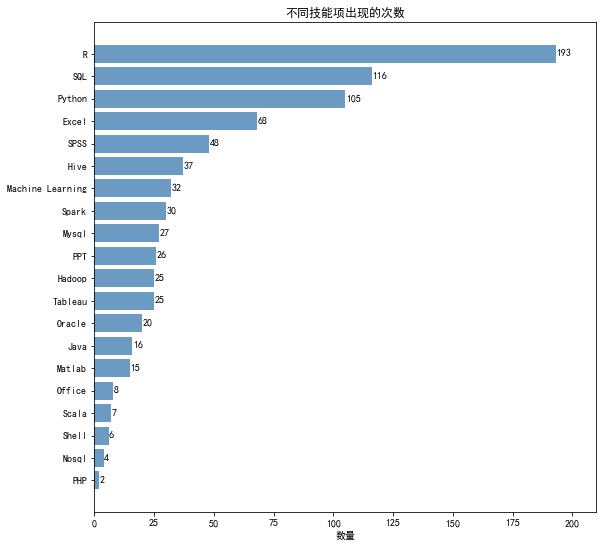

In [589]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(9,9))
plt.barh(requirement_name,requirement_number,height=0.8,color='steelblue',alpha=0.8)
plt.yticks(requirement_name)
plt.xlim(0,210)
plt.xlabel("数量")
plt.title("不同技能项出现的次数")
for x, y in enumerate(requirement_number):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

从上面的结果可以看出，R语言出现的次数最多，有193次，而第二名是SQL这样的结构化查询语言，也是非常重要的技能，第三名是Python，Python是一个处理数据非常方便的工具

有一点需要注意，一般有些技能项是只要掌握其一就可以，比如对于R、Python、SPSS这三个来说，掌握其中一个就可以。所以真正需要的技能可以总结为以下几点：
#第一：掌握像R、Python这样的数据处理、同时兼顾数据可视化能力的工具
#第二：Excel，有些公司是不需要编程语言那样的数据处理方式的，所以更需要会Excel
#第三：Hive、Spark、Hadoop，这三项技能属于大数据方向，是用来存储和处理大数据的平台
#第四：Machine Learning：机器学习算法，很多机器学习算法是可以帮助处理和转换数据的，而对于数据分析师来说，掌握这样的技能也是必不可少的
#第五：PPT等Office办公工具，编辑文档时是需要的


下面处理中文

In [800]:
chinese_text = []

#筛选出中文
for i in range(len(texts)):
    chinese_text.append(find_chinese(texts[i]))

In [801]:
#定义一些常见的词组
lexicon = ['数据分析工具','数据敏感','数据可视化','概率基础','基本数据方法','逻辑思维','数据分析']

#对中文进行分词处理
seg = pkuseg.pkuseg(user_dict=lexicon)
messages = []
for i in range(len(chinese_text)):
    mes = seg.cut(chinese_text[i])
    messages.append(mes)

In [802]:
#定义停用词列表，主要用来剔除掉无意义的词汇
stopwords = []
new_messages = []
    
with open('D://stopwords.txt',encoding='utf-8') as f:
    stopwords = f.read()

#去除停用词
for i in range(len(messages)):
    mes = []
    for w in messages[i]:
        if w not in stopwords:
            mes.append(w)
    mes = ' '.join(mes)
    new_messages.append(mes)

In [803]:
#导入jieba模块提供的关键词提取功能
import jieba.analyse as analyse

#定义提取关键词函数，top=5
def analysis(data):
    return ' '.join(analyse.extract_tags(data,topK=5,withWeight=False,allowPOS=()))

In [804]:
result_messages = []

#进行关键词提取
for i in range(len(new_messages)):
    mes = analysis(new_messages[i]).split(" ")
    result_messages.append(mes)

In [805]:
results = {}

#对关键词进行统计
for i in range(len(result_messages)):
    for j in result_messages[i]:
        results[j] = result.get(j,0) + 1

In [806]:
#降序排序
results = sorted(results.items(),key=lambda results:results[1],reverse=True)

In [807]:
results

[('数据分析', 287),
 ('能力', 262),
 ('学历', 261),
 ('本科', 256),
 ('数据', 251),
 ('熟练', 243),
 ('优先', 226),
 ('经验', 211),
 ('分析', 167),
 ('相关', 134),
 ('统计学', 132),
 ('熟悉', 125),
 ('沟通', 121),
 ('逻辑思维', 106),
 ('建模', 95),
 ('挖掘', 91),
 ('团队', 85),
 ('业务', 83),
 ('互联网', 83),
 ('精通', 79),
 ('专业', 75),
 ('工作', 68),
 ('数学', 68),
 ('数据库', 65),
 ('工具', 64),
 ('具备', 63),
 ('责任心', 63),
 ('逻辑', 62),
 ('计算机', 61),
 ('统计', 58),
 ('敏感', 55),
 ('软件', 53),
 ('协作', 47),
 ('算法', 46),
 ('善于', 45),
 ('抗压', 42),
 ('模型', 39),
 ('学习', 39),
 ('编程', 39),
 ('产品', 37),
 ('运营', 35),
 ('语言', 35),
 ('电商', 34),
 ('金融', 32),
 ('全日制', 31),
 ('优秀', 31),
 ('聚类', 29),
 ('行业', 29),
 ('思维', 28),
 ('数理', 28),
 ('统招', 27),
 ('海量', 27),
 ('用户', 26),
 ('流程', 26),
 ('理工科', 25),
 ('提取', 25),
 ('技术', 25),
 ('清晰', 24),
 ('驱动', 23),
 ('可视化', 22),
 ('报表', 21),
 ('细致', 20),
 ('独立', 19),
 ('责任感', 19),
 ('图表', 19),
 ('洞察', 19),
 ('功底', 19),
 ('理解', 19),
 ('清洗', 19),
 ('游戏', 18),
 ('机器', 18),
 ('广告', 18),
 ('项目', 18),
 ('开发', 17),
 ('洞察力', 17

上面是最终的统计结果，可以看出，对于数据分析师的要求有以下几点是最重要的：
#数据分析能力
#逻辑思维能力
#数据建模能力
#数据挖掘能力
#数据清洗能力
#数据可视化能力
#统计学知识
#数据库知识
#数学知识
#责任感
#洞察能力
#沟通能力

以上就是我的整个分析过程，谢谢观看！